Імпорт 

In [ ]:
!pip install statsmodels.api

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Feature  100 non-null    float64
 1   Target   100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None
          Feature      Target
count  100.000000  100.000000
mean     0.818375    7.574020
std      0.563685    5.384196
min      0.002774   -0.776366
25%      0.410131    3.517936
50%      0.734983    7.199392
75%      1.180003   11.116154
max      2.577209   24.448326


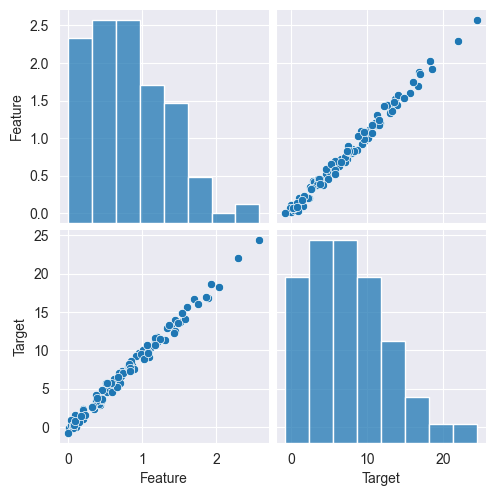

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats

# Завантаження датасету
data = pd.read_csv("Data.csv")

# Попередній аналіз
print(data.info())
print(data.describe())

# Візуалізація
sns.pairplot(data)
plt.show()

Пре-процесинг

In [38]:
# Заповнення відсутніх значень
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Видалення викидів (межі: між 1-м і 99-м перцентилем)
for col in data_imputed.columns:
    q_low = data_imputed[col].quantile(0.01)
    q_high = data_imputed[col].quantile(0.99)
    data_imputed = data_imputed[(data_imputed[col] >= q_low) & (data_imputed[col] <= q_high)]

# Нормалізація значень до діапазону [0, 1]
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data_imputed.columns)

print(data_scaled.head())

    Feature    Target
0  0.416336  0.436294
1  0.574188  0.601010
2  0.637440  0.611983
3  0.044631  0.004013
4  0.088579  0.134160


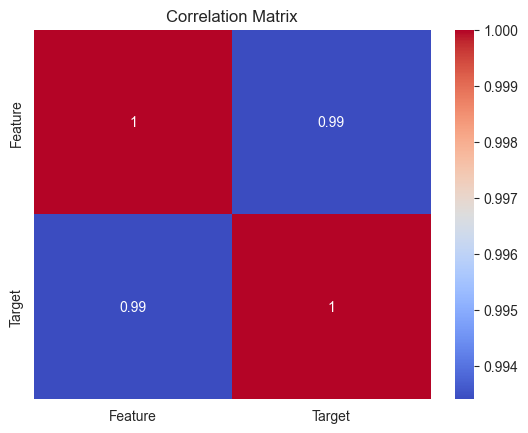

In [39]:
# Кореляційна матриця
correlation_matrix = data_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [40]:
# Розділення на ознаки (X) і цільову змінну (y)
X = data_scaled.iloc[:, :-1]  # Незалежні змінні
y = data_scaled.iloc[:, -1]   # Залежна змінна

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова нейронної мережі
model = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Прогноз
y_pred = model.predict(X_test)

In [41]:
# Обчислення метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

# Тест на нормальність залишків
residuals = y_test - y_pred
_, p_value = stats.normaltest(residuals)
print(f"Normality Test P-Value: {p_value:.4f}")

# Тест на гомоскедастичність
_, p_value_homo = stats.bartlett(X_test.iloc[:, 0], residuals)
print(f"Homoscedasticity Test P-Value: {p_value_homo:.4f}")


MAE: 0.0220
MSE: 0.0008
R2 Score: 0.9851
Normality Test P-Value: 0.6256
Homoscedasticity Test P-Value: 0.0000
